In [ ]:
try:
    import ydata_profiling
except ImportError:
    !pip install ydata-profiling


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 51.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=5dfec412e0a78df0591647cefe47a828473a07537e03bd7881e100845f2baeaf
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
from ydata_profiling import ProfileReport


In [ ]:
from pathlib import Path

# Установленные пакеты
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import roc_auc_score
import time
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
%matplotlib inline

In [ ]:
df = pd.read_csv('train.csv')
df

id  CustomerId         Surname  CreditScore Geography  Gender  \
0            0    15674932  Okwudilichukwu          668    France    Male   
1            1    15749177   Okwudiliolisa          627    France    Male   
2            2    15694510           Hsueh          678    France    Male   
3            3    15741417             Kao          581    France    Male   
4            4    15766172       Chiemenam          716     Spain    Male   
...        ...         ...             ...          ...       ...     ...   
165029  165029    15667085            Meng          667     Spain  Female   
165030  165030    15665521       Okechukwu          792    France    Male   
165031  165031    15664752            Hsia          565    France    Male   
165032  165032    15689614          Hsiung          554     Spain  Female   
165033  165033    15732798         Ulyanov          850    France    Male   

         Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       33.0       3       0.00              2        1.0             0.0   
1       33.0       1       0.00              2        1.0             1.0   
2       40.0      10       0.00              2        1.0             0.0   
3       34.0       2  148882.54              1        1.0             1.0   
4       33.0       5       0.00              2        1.0             1.0   
...      ...     ...        ...            ...        ...             ...   
165029  33.0       2       0.00              1        1.0             1.0   
165030  35.0       3       0.00              1        0.0             0.0   
165031  31.0       5       0.00              1        1.0             1.0   
165032  30.0       7  161533.00              1        0.0             1.0   
165033  31.0       1       0.00              1        1.0             0.0   

        EstimatedSalary  Exited  
0             181449.97       0  
1              49503.50       0  
2             184866.69       0  
3              84560.88       0  
4              15068.83       0  
...                 ...     ...  
165029        131834.75       0  
165030        131834.45       0  
165031        127429.56       0  
165032         71173.03       0  
165033         61581.79       1  

[165034 rows x 14 columns]

In [ ]:
profile = ProfileReport(
        df, title="Profile Report of the UCI Bank Marketing Dataset", explorative=True
    )

In [ ]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df = df.drop(columns=['id', 'CustomerId', 'Surname'])
df

CreditScore Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
0               668    France    Male  33.0       3       0.00              2   
1               627    France    Male  33.0       1       0.00              2   
2               678    France    Male  40.0      10       0.00              2   
3               581    France    Male  34.0       2  148882.54              1   
4               716     Spain    Male  33.0       5       0.00              2   
...             ...       ...     ...   ...     ...        ...            ...   
165029          667     Spain  Female  33.0       2       0.00              1   
165030          792    France    Male  35.0       3       0.00              1   
165031          565    France    Male  31.0       5       0.00              1   
165032          554     Spain  Female  30.0       7  161533.00              1   
165033          850    France    Male  31.0       1       0.00              1   

        HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0             1.0             0.0        181449.97       0  
1             1.0             1.0         49503.50       0  
2             1.0             0.0        184866.69       0  
3             1.0             1.0         84560.88       0  
4             1.0             1.0         15068.83       0  
...           ...             ...              ...     ...  
165029        1.0             1.0        131834.75       0  
165030        0.0             0.0        131834.45       0  
165031        1.0             1.0        127429.56       0  
165032        0.0             1.0         71173.03       0  
165033        1.0             0.0         61581.79       1  

[165034 rows x 11 columns]

In [ ]:
y = df['Exited']
df_selected = df.drop('Exited', axis=1)
df_selected

CreditScore Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
0               668    France    Male  33.0       3       0.00              2   
1               627    France    Male  33.0       1       0.00              2   
2               678    France    Male  40.0      10       0.00              2   
3               581    France    Male  34.0       2  148882.54              1   
4               716     Spain    Male  33.0       5       0.00              2   
...             ...       ...     ...   ...     ...        ...            ...   
165029          667     Spain  Female  33.0       2       0.00              1   
165030          792    France    Male  35.0       3       0.00              1   
165031          565    France    Male  31.0       5       0.00              1   
165032          554     Spain  Female  30.0       7  161533.00              1   
165033          850    France    Male  31.0       1       0.00              1   

        HasCrCard  IsActiveMember  EstimatedSalary  
0             1.0             0.0        181449.97  
1             1.0             1.0         49503.50  
2             1.0             0.0        184866.69  
3             1.0             1.0         84560.88  
4             1.0             1.0         15068.83  
...           ...             ...              ...  
165029        1.0             1.0        131834.75  
165030        0.0             0.0        131834.45  
165031        1.0             1.0        127429.56  
165032        0.0             1.0         71173.03  
165033        1.0             0.0         61581.79  

[165034 rows x 10 columns]

In [ ]:

cat_features = ['Geography', 'Gender', 'Tenure',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember']

num_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']


In [ ]:
num_pipeline = Pipeline(steps=[
    # ('imputer',SimpleImputer(strategy="constant")),
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
])

In [ ]:
X = df_selected
# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
%%time
rf_baseline = Pipeline(steps=[("preprocessor",preprocessor),
                        ("model", HistGradientBoostingClassifier(random_state=42))
                       ])
rf_baseline.fit(X_train, y_train)

CPU times: user 4.95 s, sys: 23 ms, total: 4.97 s
Wall time: 5.23 s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('std_scaler',
                                                                   StandardScaler())]),
                                                  ['CreditScore', 'Age',
                                                   'Balance',
                                                   'EstimatedSalary']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Geography', 'Gender',
                                                   'Tenure', 'NumOfProducts',
                                                   'HasCrCard',
                                                   'IsActiveMember'])])),
                ('model', HistGradientBoostingClassifier(random_state=42))])

In [ ]:
# Предсказание на тестовом наборе. Т.к. по заданию не известно, что нам приоритетней точность или полнота, для подбора гиперпарамтеров будем использовать accuracy
y_preds_baseline = rf_baseline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_preds_baseline))
print("Classification Report:\n", classification_report(y_test, y_preds_baseline))



Accuracy: 0.8673614687793498
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92     26052
           1       0.75      0.56      0.64      6955

    accuracy                           0.87     33007
   macro avg       0.82      0.75      0.78     33007
weighted avg       0.86      0.87      0.86     33007



In [ ]:
from hyperopt import fmin, tpe, hp, Trials

param_space = {
    'learning_rate': hp.choice('learning_rate', np.arange(0.1, 10.1,0.1)),
    'max_depth' : hp.choice('max_depth', [None, 10, 20, 30, 50, 100]),
    'l2_regularization' : hp.choice('l2_regularization', list(range(0,50,5))),
    'min_samples_leaf' : hp.choice('min_samples_leaf', np.arange(1, 50, 1))
}



In [ ]:
from sklearn.model_selection import cross_val_score


def obj_fnc(params):

  model = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", HistGradientBoostingClassifier(**params,
                                              random_state=42))
    ])


  accuracy = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy').mean()
  return -1*accuracy

In [ ]:
# Запуск Hyperopt для поиска оптимальных гиперпараметров

trials = Trials()
best_params = fmin(obj_fnc, space=param_space, algo=tpe.suggest, max_evals=100,
                   trials=trials, show_progressbar=True)

100%|██████████| 100/100 [05:35<00:00,  3.35s/trial, best loss: -0.865020033780969]


In [ ]:
from hyperopt import space_eval
res_params = space_eval(param_space, trials.argmin)
res_params

{'l2_regularization': 30,
 'learning_rate': 0.2,
 'max_depth': 10,
 'min_samples_leaf': 14}

In [ ]:
# Использование модели с лучшими гиперпараметрами для предсказаний на тестовой выборке
%%time
hyperopt = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", HistGradientBoostingClassifier(l2_regularization=res_params['l2_regularization'],
                                          learning_rate=res_params['learning_rate'],
                                            max_depth=res_params['max_depth'],
                                                  min_samples_leaf=res_params['min_samples_leaf']))])
hyperopt.fit(X_train, y_train)

CPU times: user 3.66 s, sys: 17.8 ms, total: 3.68 s
Wall time: 3.74 s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('std_scaler',
                                                                   StandardScaler())]),
                                                  ['CreditScore', 'Age',
                                                   'Balance',
                                                   'EstimatedSalary']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Geography', 'Gender',
                                                   'Tenure', 'NumOfProducts',
                                                   'HasCrCard',
                                                   'IsActiveMember'])])),
                ('classifier',
                 HistGradientBoostingClassifier(l2_regularization=30,
                                                learning_rate=0.2, max_depth=10,
                                                min_samples_leaf=14))])

In [ ]:
hyperopt_preds = hyperopt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, hyperopt_preds))
print("Classification Report:\n", classification_report(y_test, hyperopt_preds))



Accuracy: 0.8675432484018542
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92     26052
           1       0.74      0.57      0.64      6955

    accuracy                           0.87     33007
   macro avg       0.82      0.76      0.78     33007
weighted avg       0.86      0.87      0.86     33007



В данном случае подбор гиперпараметров не помог существенно увеличить запрашиваемую метрику, но удалось значительно уменьшить время обучения модели, что также является важным параметром. Отрицательный результат в увеличении метрики accuracy при подборе гиперпараметров может гоорить о том, что базовые значения параметров модели уже достаточно хорошо подобраны для данного сетла данных.

точность: 0.7426263385309037
полнота: 0.5683680805176132


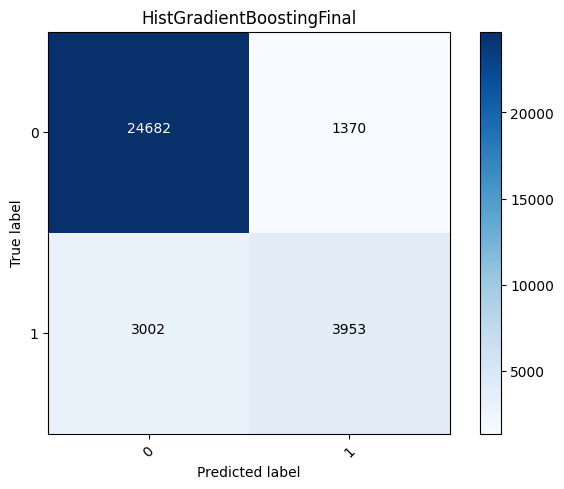

In [ ]:
# Визуализируем матрицу ошибок
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



plot_confusion_matrix(confusion_matrix(y_test, hyperopt_preds), classes=['0','1'], title='HistGradientBoostingFinal')
print('точность:', precision_score(y_test, hyperopt_preds))
print('полнота:', recall_score(y_test, hyperopt_preds))